##Exploratory Data Analysis (EDA)

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
plt.style.use("seaborn-v0_8")
sns.set_context("notebook")

# Display settings
pd.set_option("display.max_rows", 10)
pd.set_option("display.float_format", "{:.3f}".format)

### Load the Dataset

In [2]:
# Load dataset
df = pd.read_csv("electricity_demand_large.csv")

# Preview data
df.head()

,time_normalized,hour,true_demand,measured_demand
0,0.000,0.000,1.800,1.850
1,0.001,0.024,1.819,1.805
2,0.002,0.048,1.838,1.902
3,0.003,0.072,1.856,2.009
4,0.004,0.096,1.875,1.851


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time_normalized  1000 non-null   float64
 1   hour             1000 non-null   float64
 2   true_demand      1000 non-null   float64
 3   measured_demand  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [4]:
df.describe()

,time_normalized,hour,true_demand,measured_demand
count,1000.000,1000.000,1000.000,1000.000
mean,0.500,12.000,1.500,1.502
std,0.289,6.939,0.820,0.825
min,0.000,0.000,0.011,-0.224
25%,0.250,6.000,0.834,0.852
50%,0.500,12.000,1.500,1.480
75%,0.750,18.000,2.166,2.160
max,1.000,24.000,2.989,3.194


### Understanding Time Variable

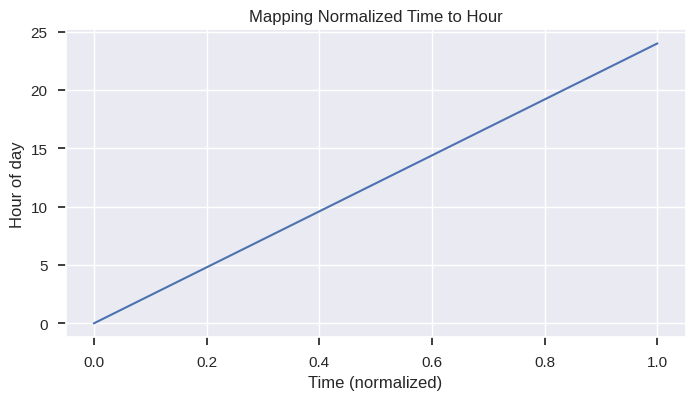

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(df["time_normalized"], df["hour"])
plt.xlabel("Time (normalized)")
plt.ylabel("Hour of day")
plt.title("Mapping Normalized Time to Hour")
plt.grid(True)
plt.show()

### True Electricity Demand Curve

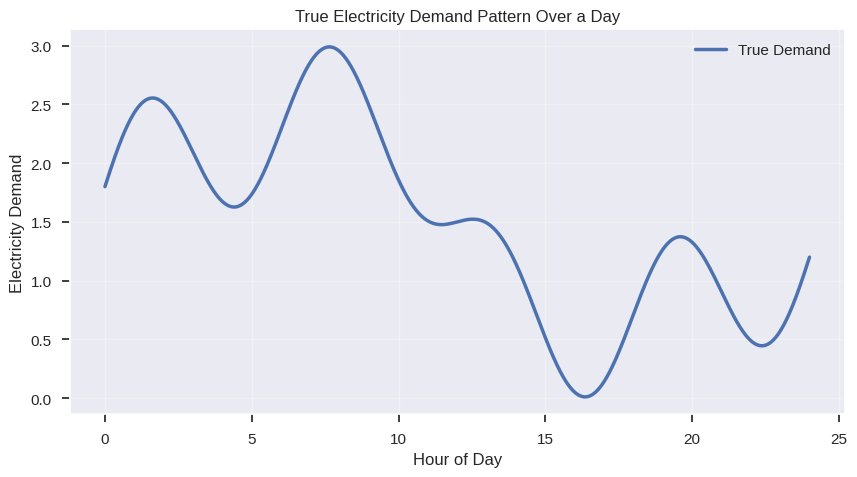

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(
    df["hour"],
    df["true_demand"],
    linewidth=2.5,
    label="True Demand"
)

plt.xlabel("Hour of Day")
plt.ylabel("Electricity Demand")
plt.title("True Electricity Demand Pattern Over a Day")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Measured (Noisy) Demand

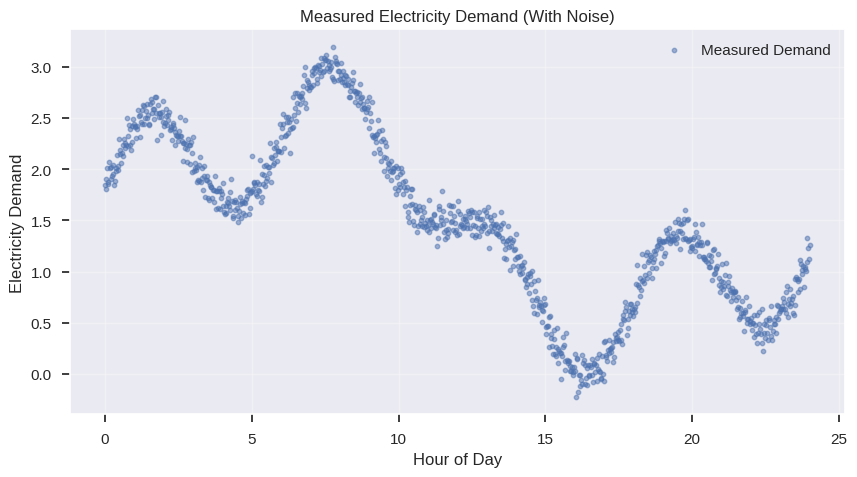

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(
    df["hour"],
    df["measured_demand"],
    s=10,
    alpha=0.5,
    label="Measured Demand"
)

plt.xlabel("Hour of Day")
plt.ylabel("Electricity Demand")
plt.title("Measured Electricity Demand (With Noise)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### True vs Measured Demand Comparison

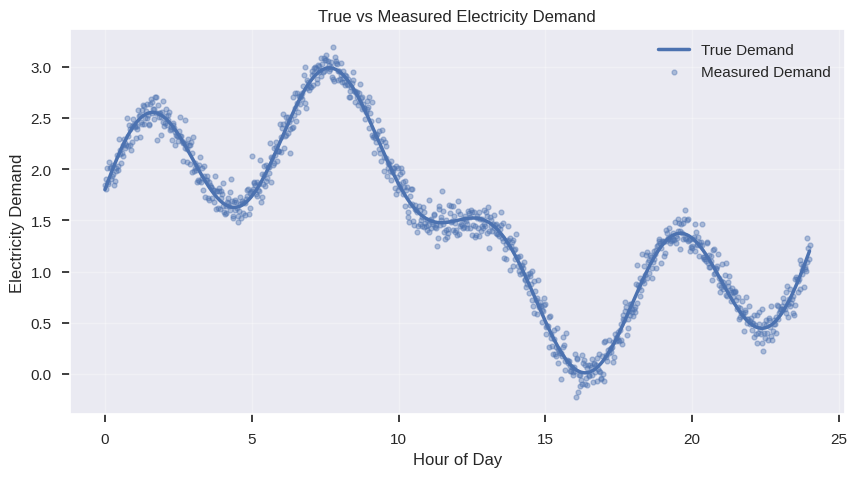

In [8]:
plt.figure(figsize=(10, 5))

plt.plot(
    df["hour"],
    df["true_demand"],
    linewidth=2.5,
    label="True Demand"
)

plt.scatter(
    df["hour"],
    df["measured_demand"],
    s=12,
    alpha=0.4,
    label="Measured Demand"
)

plt.xlabel("Hour of Day")
plt.ylabel("Electricity Demand")
plt.title("True vs Measured Electricity Demand")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Noise Distribution Analysis

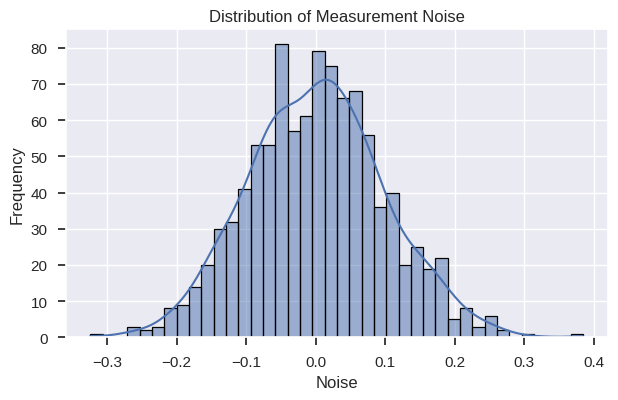

In [9]:
df["noise"] = df["measured_demand"] - df["true_demand"]

plt.figure(figsize=(7, 4))
sns.histplot(df["noise"], bins=40, kde=True)
plt.title("Distribution of Measurement Noise")
plt.xlabel("Noise")
plt.ylabel("Frequency")
plt.show()

### Correlation Analysis

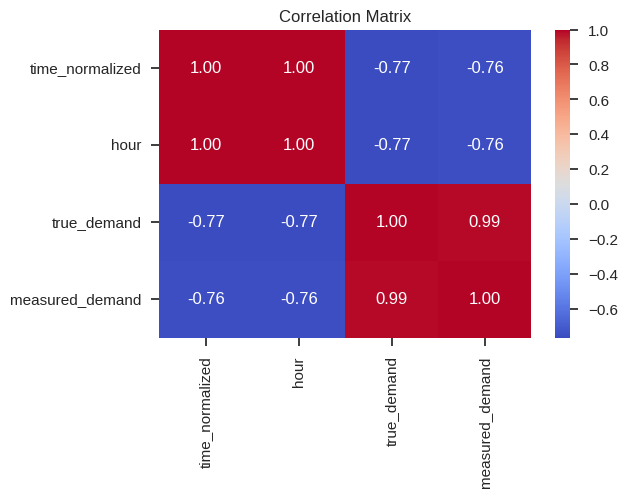

In [10]:
corr = df[["time_normalized", "hour", "true_demand", "measured_demand"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

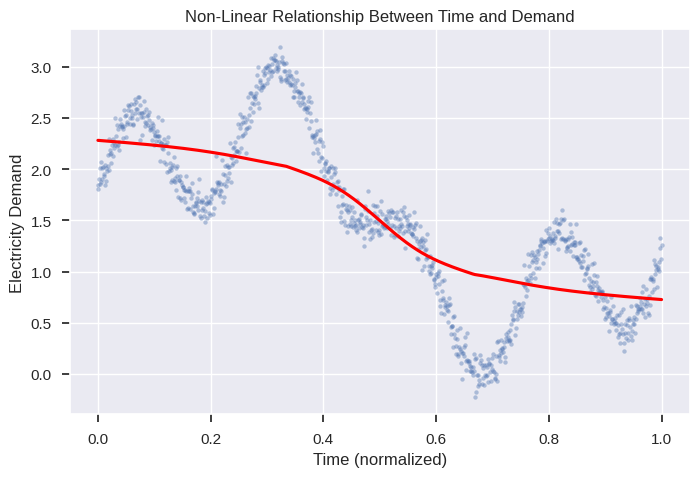

In [11]:
plt.figure(figsize=(8, 5))
sns.regplot(
    x=df["time_normalized"],
    y=df["measured_demand"],
    lowess=True,
    scatter_kws={"s": 10, "alpha": 0.4},
    line_kws={"color": "red"}
)

plt.xlabel("Time (normalized)")
plt.ylabel("Electricity Demand")
plt.title("Non-Linear Relationship Between Time and Demand")
plt.show()

### 🔍 EDA Summary

- Electricity demand follows a **strong non-linear daily pattern**
- Measurement noise is approximately Gaussian
- Linear correlation exists but is insufficient
- Dataset is clean and well-suited for regression models
- Motivates advanced models:
  - Random Fourier Features
  - SVR
  - Gaussian Process Regression
  - Neural Networks
  - LSTM (time-series)
